# Crypto DA

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [114]:
df = pd.read_csv('crypto.csv')

# Data Understanding
- Shape
- Head and Tail
- Dtypes
- Describe
- Etc.

In [115]:
df.head()

,Date,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
0,2017-11-13 00:00:00+00:00,6559.490234,6263249920,316.716003,1041889984,1.00935,767884032,1.68662,12238800
1,2017-11-14 00:00:00+00:00,6635.750000,3197110016,337.631012,1069680000,1.00683,429857984,1.59258,7829600
2,2017-11-15 00:00:00+00:00,7315.540039,4200880128,333.356995,722665984,1.00318,449671008,1.53045,7615500
3,2017-11-16 00:00:00+00:00,7871.689941,5123809792,330.924011,797254016,1.00212,650278976,1.57792,8928640
4,2017-11-17 00:00:00+00:00,7708.990234,4651670016,332.394012,621732992,1.00139,639398016,1.51036,8508840


In [116]:
df.tail()

,Date,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
1822,2022-11-09 00:00:00+00:00,15880.780273,102905151606,1100.169800,38864492427,0.998600,143975136007,266.853119,3191459132
1823,2022-11-10 00:00:00+00:00,17586.771484,83202283721,1299.464600,28581002122,0.997835,114807119109,304.080048,2461275687
1824,2022-11-11 00:00:00+00:00,17034.292969,55871616488,1287.221069,20920539099,0.998218,74933538836,289.820557,1625174426
1825,2022-11-12 00:00:00+00:00,16799.185547,29717699419,1255.268311,10964962767,0.998616,40298138489,282.341278,1189401392
1826,2022-11-13 00:00:00+00:00,16550.126953,25153593344,1228.583984,9734809600,0.998950,36130271232,279.073547,904519232


In [117]:
df.dtypes #Change date to DateTime

Date              object
Close (BTC)      float64
Volume (BTC)       int64
Close (ETH)      float64
Volume (ETH)       int64
Close (USDT)     float64
Volume (USDT)      int64
Close (BNB)      float64
Volume (BNB)       int64
dtype: object

In [118]:
df.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,20228.315369,2.630272e+10,1129.229883,1.308885e+10,1.001606,4.156009e+10,143.886168,9.717711e+08
std,17028.454586,1.995516e+10,1203.999710,1.086878e+10,0.005771,3.842981e+10,184.167061,1.452963e+09
min,3236.761719,2.923670e+09,84.308296,6.217330e+08,0.966644,4.298580e+08,1.510360,9.284000e+03
25%,7666.110107,1.082725e+10,208.977219,4.495085e+09,0.999988,6.042266e+09,14.114409,1.360422e+08
50%,10793.339844,2.399141e+10,474.911011,1.095112e+10,1.000508,3.639024e+10,23.811028,3.480300e+08
75%,33734.515625,3.563229e+10,1802.761414,1.836356e+10,1.002518,6.090617e+10,293.938461,1.410656e+09
max,67566.828125,3.509679e+11,4812.087402,8.448291e+10,1.077880,2.790675e+11,675.684082,1.798295e+10


In [119]:
df.shape

(1827, 9)

In [120]:
df.columns

Index(['Date', 'Close (BTC)', 'Volume (BTC)', 'Close (ETH)', 'Volume (ETH)',
       'Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'],
      dtype='object')

# Data Preperaton
- Changing Names
- Changing Dtypes
- Feature Creation
- Etc.

In [121]:
df = df.rename(columns=({'Date': 'date', 'Close (BTC)': 'close_btc', 'Volume (BTC)': 'volume_btc', 'Close (ETH)': 'close_eth', 'Volume (ETH)': 'volume_eth',
       'Close (USDT)': 'close_usdt', 'Volume (USDT)': 'volume_usdt', 'Close (BNB)': 'close_bnb', 'Volume (BNB)': 'volume_bnb'}))

In [122]:
df.head()

,date,close_btc,volume_btc,close_eth,volume_eth,close_usdt,volume_usdt,close_bnb,volume_bnb
0,2017-11-13 00:00:00+00:00,6559.490234,6263249920,316.716003,1041889984,1.00935,767884032,1.68662,12238800
1,2017-11-14 00:00:00+00:00,6635.750000,3197110016,337.631012,1069680000,1.00683,429857984,1.59258,7829600
2,2017-11-15 00:00:00+00:00,7315.540039,4200880128,333.356995,722665984,1.00318,449671008,1.53045,7615500
3,2017-11-16 00:00:00+00:00,7871.689941,5123809792,330.924011,797254016,1.00212,650278976,1.57792,8928640
4,2017-11-17 00:00:00+00:00,7708.990234,4651670016,332.394012,621732992,1.00139,639398016,1.51036,8508840


In [123]:
df['date'] = pd.to_datetime(df['date'])

I want to add a column calle [`profit_btc`] that will take the close date from the next day and subtract it from the following day. For example 1/1/2023 if the price is 100 and then the next day 1/2/2023 the price is 150, we would do 150 - 100, meaning we got a $50 profit. *(Or in some cases loses)*

In [124]:
df['profit_btc'] = df['close_btc'].shift(-1) - df['close_btc']
df['profit_eth'] = df['close_eth'].shift(-1) - df['close_eth']
df['profit_usdt'] = df['close_usdt'].shift(-1) - df['close_usdt']
df['profit_bnb'] = df['close_bnb'].shift(-1) - df['close_bnb']

df.head() #Cool

,date,close_btc,volume_btc,close_eth,volume_eth,close_usdt,volume_usdt,close_bnb,volume_bnb,profit_btc,profit_eth,profit_usdt,profit_bnb
0,2017-11-13 00:00:00+00:00,6559.490234,6263249920,316.716003,1041889984,1.00935,767884032,1.68662,12238800,76.259766,20.915009,-0.00252,-0.09404
1,2017-11-14 00:00:00+00:00,6635.750000,3197110016,337.631012,1069680000,1.00683,429857984,1.59258,7829600,679.790039,-4.274017,-0.00365,-0.06213
2,2017-11-15 00:00:00+00:00,7315.540039,4200880128,333.356995,722665984,1.00318,449671008,1.53045,7615500,556.149902,-2.432983,-0.00106,0.04747
3,2017-11-16 00:00:00+00:00,7871.689941,5123809792,330.924011,797254016,1.00212,650278976,1.57792,8928640,-162.699707,1.470001,-0.00073,-0.06756
4,2017-11-17 00:00:00+00:00,7708.990234,4651670016,332.394012,621732992,1.00139,639398016,1.51036,8508840,81.159668,15.217987,0.00092,0.16397


In [125]:
#Last values in those columns are NaN cause there is no other value to look for. Replace the NaN with mean.
eth_mean = df.profit_eth.mean()
btc_mean = df.profit_btc.mean()
usdt_mean = df.profit_usdt.mean()
bnb_mean = df.profit_bnb.mean()

df.profit_btc.fillna(btc_mean, inplace=True)
df.profit_eth.fillna(eth_mean, inplace=True)
df.profit_usdt.fillna(usdt_mean, inplace=True)
df.profit_bnb.fillna(bnb_mean, inplace=True)

In [126]:
df.tail()

,date,close_btc,volume_btc,close_eth,volume_eth,close_usdt,volume_usdt,close_bnb,volume_bnb,profit_btc,profit_eth,profit_usdt,profit_bnb
1822,2022-11-09 00:00:00+00:00,15880.780273,102905151606,1100.169800,38864492427,0.998600,143975136007,266.853119,3191459132,1705.991211,199.294800,-0.000765,37.226929
1823,2022-11-10 00:00:00+00:00,17586.771484,83202283721,1299.464600,28581002122,0.997835,114807119109,304.080048,2461275687,-552.478516,-12.243530,0.000383,-14.259491
1824,2022-11-11 00:00:00+00:00,17034.292969,55871616488,1287.221069,20920539099,0.998218,74933538836,289.820557,1625174426,-235.107422,-31.952759,0.000398,-7.479279
1825,2022-11-12 00:00:00+00:00,16799.185547,29717699419,1255.268311,10964962767,0.998616,40298138489,282.341278,1189401392,-249.058594,-26.684326,0.000334,-3.267731
1826,2022-11-13 00:00:00+00:00,16550.126953,25153593344,1228.583984,9734809600,0.998950,36130271232,279.073547,904519232,5.471324,0.499380,-0.000006,0.151910


# Feature Understanding
  
(Univariate Analysis)

- KDE
- Boxplot
- Scatterplots
- Lineplots

In [127]:
scaler = MinMaxScaler()

df_normed = df.copy()

df_normed[['profit_bnb', 'profit_btc', 'profit_eth', 'profit_usdt']] = scaler.fit_transform(df_normed[['profit_bnb', 'profit_btc', 'profit_eth', 'profit_usdt']])

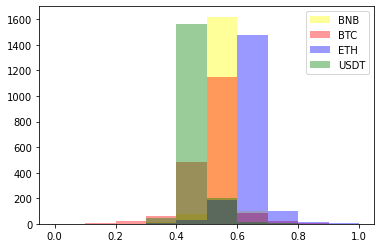

In [128]:
plt.hist(df_normed['profit_bnb'], color='yellow', alpha=0.4, label='BNB')
plt.hist(df_normed['profit_btc'], color='red', alpha=0.4, label='BTC')
plt.hist(df_normed['profit_eth'], color='blue', alpha=0.4, label='ETH')
plt.hist(df_normed['profit_usdt'], color='green', alpha=0.4, label='USDT')
plt.legend()
plt.show()

[]

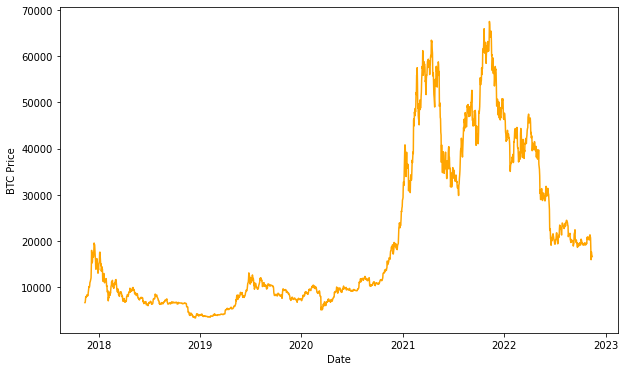

In [129]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close_btc', data=df, color='orange')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.plot()

[]

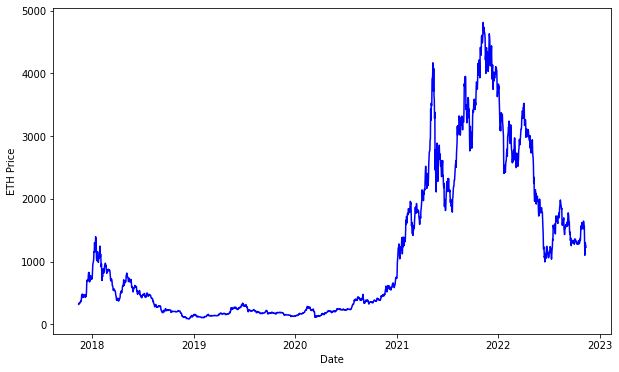

In [130]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close_eth', data=df, color='blue')
plt.xlabel('Date')
plt.ylabel('ETH Price')
plt.plot()

[]

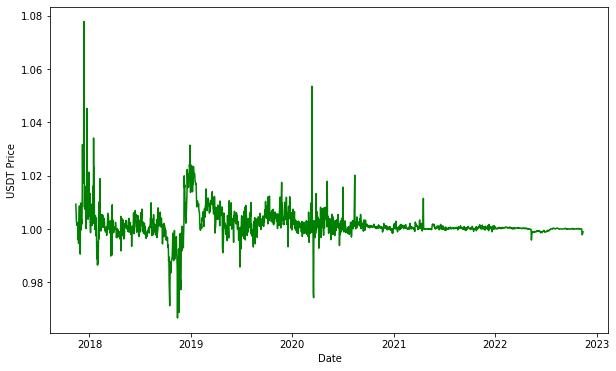

In [131]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close_usdt', data=df, color='green')
plt.xlabel('Date')
plt.ylabel('USDT Price')
plt.plot()

[]

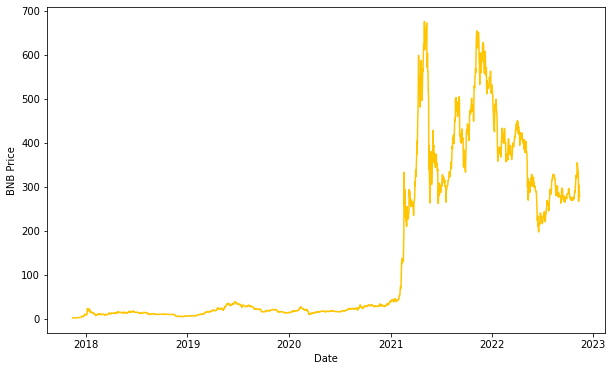

In [132]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close_bnb', data=df, color='#FFC500')
plt.xlabel('Date')
plt.ylabel('BNB Price')
plt.plot()

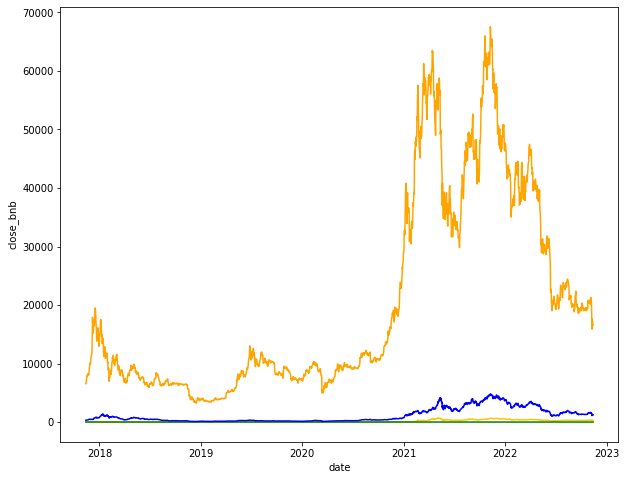

In [133]:
plt.figure(figsize=(10,8))
sns.lineplot(x='date', y='close_bnb', data=df_normed, color='#FFC500')
sns.lineplot(x='date', y='close_usdt', data=df_normed, color='green')
sns.lineplot(x='date', y='close_eth', data=df_normed, color='blue')
sns.lineplot(x='date', y='close_btc', data=df_normed, color='orange')
plt.show()

# Feature Relationships

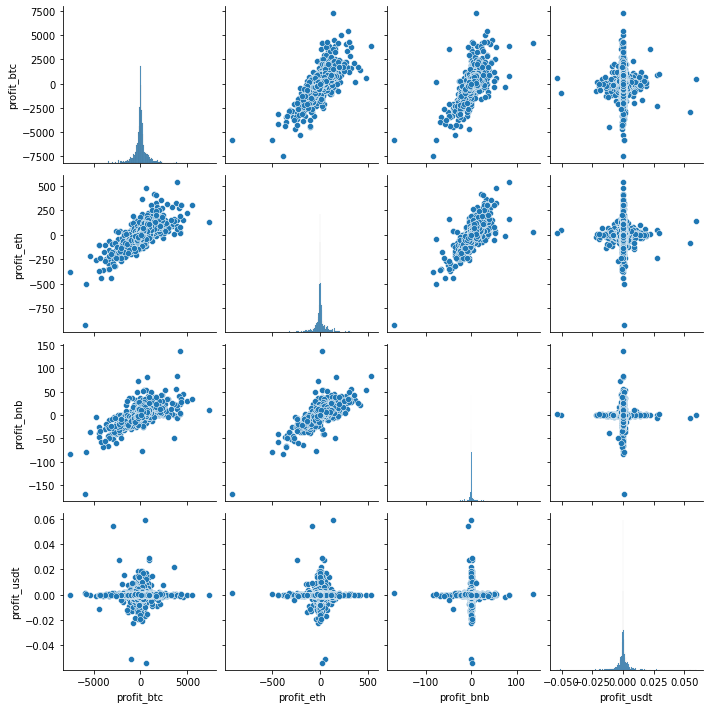

In [134]:
sns.pairplot(df,
             vars=['profit_btc', 'profit_eth', 'profit_bnb', 'profit_usdt'])
plt.show()

In [135]:
df_corr = df[['close_btc','close_bnb',
    'close_usdt','close_eth']].dropna().corr()
df_corr

,close_btc,close_bnb,close_usdt,close_eth
close_btc,1.000000,0.901167,-0.149198,0.924279
close_bnb,0.901167,1.000000,-0.162632,0.955627
close_usdt,-0.149198,-0.162632,1.000000,-0.152129
close_eth,0.924279,0.955627,-0.152129,1.000000


<AxesSubplot:>

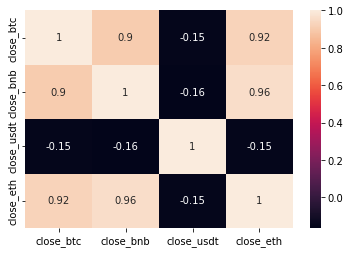

In [136]:
sns.heatmap(df_corr, annot=True)

# Checking Volumes


In [137]:
df.head()

,date,close_btc,volume_btc,close_eth,volume_eth,close_usdt,volume_usdt,close_bnb,volume_bnb,profit_btc,profit_eth,profit_usdt,profit_bnb
0,2017-11-13 00:00:00+00:00,6559.490234,6263249920,316.716003,1041889984,1.00935,767884032,1.68662,12238800,76.259766,20.915009,-0.00252,-0.09404
1,2017-11-14 00:00:00+00:00,6635.750000,3197110016,337.631012,1069680000,1.00683,429857984,1.59258,7829600,679.790039,-4.274017,-0.00365,-0.06213
2,2017-11-15 00:00:00+00:00,7315.540039,4200880128,333.356995,722665984,1.00318,449671008,1.53045,7615500,556.149902,-2.432983,-0.00106,0.04747
3,2017-11-16 00:00:00+00:00,7871.689941,5123809792,330.924011,797254016,1.00212,650278976,1.57792,8928640,-162.699707,1.470001,-0.00073,-0.06756
4,2017-11-17 00:00:00+00:00,7708.990234,4651670016,332.394012,621732992,1.00139,639398016,1.51036,8508840,81.159668,15.217987,0.00092,0.16397


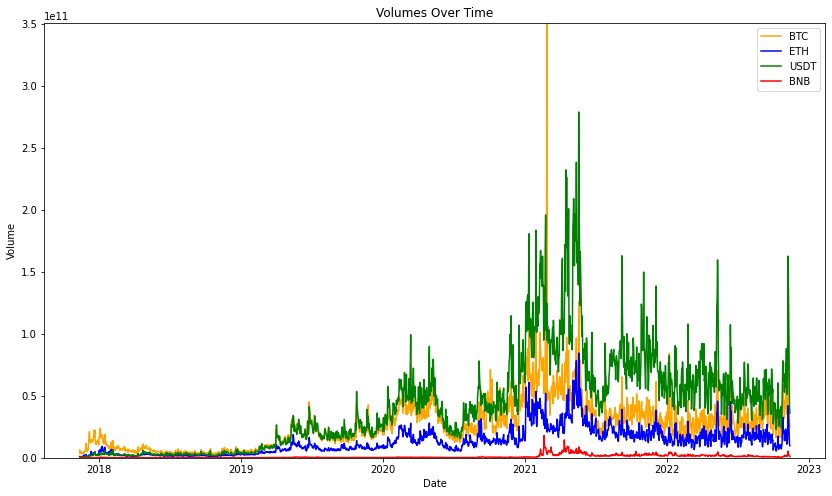

In [138]:
plt.figure(figsize=(14,8))
sns.lineplot(x='date', y='volume_btc', data=df, color='orange', label='BTC')
sns.lineplot(x='date', y='volume_eth', data=df, color='blue', label='ETH')
sns.lineplot(x='date', y='volume_usdt', data=df, color='green', label='USDT')
sns.lineplot(x='date',y='volume_bnb', data=df, color='red', label='BNB')
plt.title('Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.ylim(0, df[['volume_btc', 'volume_eth', 'volume_usdt', 'volume_bnb']].max().max() + 1)
plt.show()


Question: Checking if the massive spike in BTC is a error or actual problem.

In [139]:
df[df['volume_btc'] == df['volume_btc'].max()]

,date,close_btc,volume_btc,close_eth,volume_eth,close_usdt,volume_usdt,close_bnb,volume_bnb,profit_btc,profit_eth,profit_usdt,profit_bnb
1201,2021-02-26 00:00:00+00:00,46339.761719,350967941479,1446.033691,31435997881,0.999994,124624106848,221.680435,4167145958,-151.308594,13.939453,0.001184,3.569


Well, turns out that it is actually not a error but a historical day in BTC. [`CoinMarketCap`](https://coinmarketcap.com/historical/20210226/) on that day.

# Questions About The Data
- Was the all time highs around the same time?


In [150]:
# Find the maximum closing prices for BTC, ETH, BNB, and USDT
max_btc = df[df['close_btc'] == df['close_btc'].max()]
max_eth = df[df['close_eth'] == df['close_eth'].max()]
max_bnb = df[df['close_bnb'] == df['close_bnb'].max()]
max_usdt = df[df['close_usdt'] == df['close_usdt'].max()]

# Print the dates of the maximum closing prices
print(f"Date of the max BTC: {max_btc['date'].dt.strftime('%Y-%m-%d')}")
print(f"Date of the max ETH: {max_eth['date'].dt.strftime('%Y-%m-%d')}")
print(f"Date of the max BNB: {max_bnb['date'].dt.strftime('%Y-%m-%d')}")
print(f"Date of the max USDT: {max_usdt['date'].dt.strftime('%Y-%m-%d')}")


Date of the max BTC: 1456    2021-11-08
Name: date, dtype: object
Date of the max ETH: 1456    2021-11-08
Name: date, dtype: object
Date of the max BNB: 1267    2021-05-03
Name: date, dtype: object
Date of the max USDT: 29    2017-12-12
Name: date, dtype: object


We see that ETH and BTC actually had their all-time high on the same day but binance had its ATH a bit earlier which is interesting. One thing I found curious was the date of the ATH for USDT. I want to look into this more actually, I think that since it doesn't move so much that there are multiple ATH. 

In [158]:
#df.close_usdt.max()
# qm = df.close_usdt.mean()
# df['close_usdt'] = df.close_usdt.replace(1.0778800249099731, qm)

I tried to replace that max with the mean to see if it was just a error becasue on CoinMarketCap that day is not a all time high, so I think this is a error in the dataset.